In [2]:
import numpy as np
import matplotlib.pyplot as plt

1)

In [3]:
def closedform(phi,labels):
    return np.linalg.inv(np.dot(phi.T,phi)).dot(phi.T).dot(labels)

In [4]:
phi=np.array([-2.0,-1.0,0.0,2.0])
phi=np.concatenate([phi.reshape(-1,1),np.ones(4).reshape(-1,1)],axis=1)
labels=np.array([2.0,3.0,1.0,-1.0])
print(phi)

[[-2.  1.]
 [-1.  1.]
 [ 0.  1.]
 [ 2.  1.]]


In [5]:
w=closedform(phi,labels)
print(w)

[-0.88571429  1.02857143]


In [6]:
w.dot([1,1])

0.14285714285714313

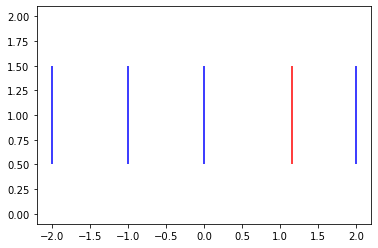

In [7]:
plt.figure()
x=phi[:,0]
#plt.hlines(1,min(x)-1,max(x)+1)
plt.eventplot(x,orientation='horizontal',colors='b')
plt.eventplot(np.array([-w[1]/w[0]]),orientation='horizontal',colors='r')
plt.show()

In [8]:
yd=(labels-np.dot(w,phi.T))
np.mean(1/2*(yd*yd))

0.23571428571428574

2)

In [9]:
phi=np.array([[1,1],[2,1],[1,3],[3,3]])
phi=np.concatenate([phi,np.ones(4).reshape(-1,1)],axis=1)
print(phi)
label=np.array([1.4,0.5,2,2.5])

[[1. 1. 1.]
 [2. 1. 1.]
 [1. 3. 1.]
 [3. 3. 1.]]


In [10]:
w=closedform(phi,label)
print(w)

[0.02  0.645 0.275]


In [11]:
print(np.array([2,3,1]).dot(w))

2.25


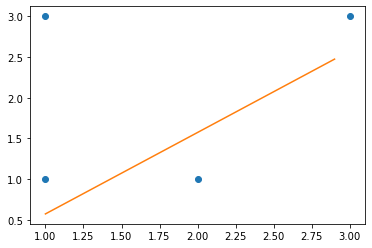

In [12]:
plt.plot(phi[:,0],phi[:,1],'o',linewidth=0)
x=np.arange(1,3,0.1)
plt.plot(x,(w[1]*x-w[2])/w[1])

In [13]:
yd=(label-np.dot(w,phi.T))
np.mean(1/2*(yd*yd))

0.06612500000000002

3)

In [14]:
phi=np.array([3,4,6,10,12]).reshape(-1,1)
phi_1=np.log(phi)
phi_1=np.concatenate([phi_1,np.ones(5).reshape(-1,1)],axis=1)
phi_2=phi*phi
phi_2=np.concatenate([phi_2,np.ones(5).reshape(-1,1)],axis=1)
label=np.array([1.5,9.3,23.5,45.8,60.1])

In [15]:
w_1=closedform(phi_1,label)
w_2=closedform(phi_2,label)
print(w_1,w_2)

[ 41.39294511 -46.99843777] [0.41343359 2.82055071]


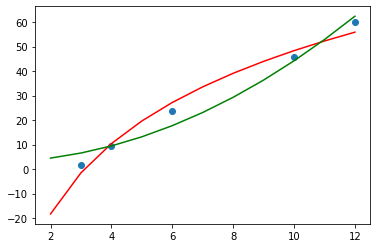

In [16]:
plt.plot(phi,label,'o')
x=np.arange(2,13)
plt.plot(x,w_1[0]*np.log(x)+w_1[1],'r')
plt.plot(x,w_2[0]*x**2+w_2[1],'g')

In [17]:
yd=(label-np.dot(w_1,phi_1.T))
print(np.mean(1/2*(yd*yd)))

yd=(label-np.dot(w_2,phi_2.T))
print(np.mean(1/2*(yd*yd)))

4.806726314713909
6.678812830572506


4)

In [18]:
def sigmoid(w,x):
    return 1/(1+np.exp(-np.dot(w,x)))


In [19]:
def GD_cross_binary(phi,label,epochs,eta):
    w=np.zeros(phi.shape[1])
    for i in range(epochs):
        k=np.zeros(phi.shape[1])
        for x,y in zip(phi,label):
            k+=-x*(y-sigmoid(w,x))
        w-=eta*k
    return(w)

def SGD_cross_binary(phi,label,epochs,eta):
    w=np.zeros(phi.shape[1])
    for i in range(epochs):
        n=int(np.random.rand()*label.shape[0])
        x=phi[n]
        y=label[n]
        w=w+eta*x*(y-sigmoid(w,x))
    return(w)

In [20]:
phi=np.array([[-1,0],[0,0.25],[1,1],[1,-1]]).reshape(-1,2)
phi=np.concatenate([phi,np.ones(4).reshape(-1,1)],axis=1)
label=np.array([0,1,1,0])

In [21]:
print(GD_cross_binary(phi,label,1,1))
print(GD_cross_binary(phi,label,2000,1))

[0.5   1.125 0.   ]
[ 8.29875236 17.23438152  1.74508231]


In [22]:
l=0
w=GD_cross_binary(phi,label,2,1)
for x,y in zip(phi,label):
    l-=y*np.log(sigmoid(w,x))+(1-y)*np.log(1-sigmoid(w,x))
print(l)


1.2776187768408862


In [23]:
l=0
w=GD_cross_binary(phi,label,1000,1)
for x,y in zip(phi,label):
    l-=y*np.log(sigmoid(w,x))+(1-y)*np.log(1-sigmoid(w,x))
print(l)

0.009075743424905011


In [24]:
print(SGD_cross_binary(phi,label,200,1))
print(SGD_cross_binary(phi,label,1,1))

[ 3.36006458  7.34195159 -0.01256682]
[0.    0.125 0.5  ]


5)

In [25]:
def Prob(w,y,x,label):
    zx=0
    for y2 in label:
        zx+=np.exp(np.dot(w[y2],x))
    
    return (np.exp(np.dot(w[y],x))/zx)

In [35]:
def SGD_cross_multi(phi,label,epochs,eta,nclass,Prob):
    w=np.zeros([nclass,phi.shape[1]])
    e=np.identity(nclass)
    for i in range(epochs):
        n=int(np.random.rand()*label.shape[0])
        x=phi[n]
        y=label[n]
        v=np.zeros([nclass,phi.shape[1]])
        for y2 in range(0,nclass):
            v+=Prob(w,y2,x,label)*np.outer(e[y2],x)
        w+=eta*(np.outer(e[y],x)-v)

    return(w)

In [36]:
def SGD_cross_multi2(phi,label,epochs,eta,nclass,Prob):
    w=np.zeros([nclass,phi.shape[1]])
    for i in range(epochs):
        e=np.zeros([nclass,phi.shape[1]])
        n=int(np.random.rand()*label.shape[0])
        x=phi[n]
        y=label[n]
        v=np.zeros([nclass,phi.shape[1]])
        for y2 in range(0,nclass):
            e[y2]=Prob(w,y2,x,label)*x
        e[y]-=x
        w-=eta*e

    return(w)

In [28]:
from sklearn.datasets import load_digits
data = load_digits()
X=data['data']
X=np.concatenate([X,np.ones([X.shape[0],1])],axis=1)
print(X)
y=data['target']

[[ 0.  0.  5. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  9.  0.  1.]
 ...
 [ 0.  0.  1. ...  0.  0.  1.]
 [ 0.  0.  2. ...  0.  0.  1.]
 [ 0.  0. 10. ...  1.  0.  1.]]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [37]:
w=SGD_cross_multi(X_train,y_train,10,0.001,10,Prob)
w2=SGD_cross_multi(X_train,y_train,100,0.001,10,Prob)

In [45]:
w=SGD_cross_multi2(X_train,y_train,10,0.001,10,Prob)
w2=SGD_cross_multi2(X_train,y_train,1000,0.001,10,Prob)

In [31]:
def precision_loss(w,input,y):
    y3=np.dot(w,input.T).T
    yp=np.zeros(y3.shape[0])
    for i in range(y3.shape[0]):
        yp[i]=np.argmax(y3[i])
    return  np.mean(yp == y),np.mean(1/2*(yp-y)**2)

In [43]:
print(precision_loss(w,X_test,y_test))
print(precision_loss(w,X_train,y_train))

(0.12222222222222222, 10.654166666666667)
(0.16005567153792624, 10.020876826722338)


In [42]:
print(precision_loss(w2,X_test,y_test))
print(precision_loss(w2,X_train,y_train))

(0.5777777777777777, 4.0125)
(0.5782881002087683, 4.661447459986082)


In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, penalty='none')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9583333333333334
